# Linear Regression

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [24]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/0. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [25]:
benign = df[df.diagnosis == 'B']
maglignant = df[df.diagnosis == 'M']

### Building a Machine Learning Linear Regression

In [26]:
X = df['radius_mean'].values
X = X.reshape(-1,1)
y = df['texture_mean'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [27]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [28]:
def linear_activation(z):
    return z

lm_model = SingleNeuron(linear_activation)
lm_model.train(X_train, y_train, alpha = 0.0001, epochs = 1000)

In [29]:
lm_pre = lm_model.predict(X_test.reshape(-1,1))

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

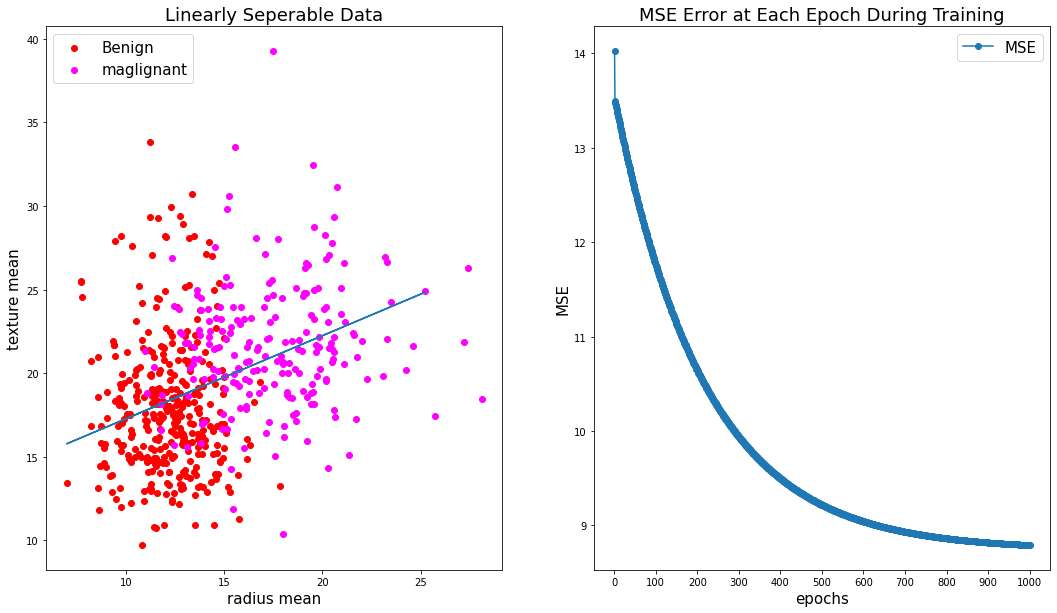

In [30]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))
ax1.scatter(benign.radius_mean, 
            benign.texture_mean, 
            color = "red", 
            label = "Benign")
ax1.scatter(maglignant.radius_mean, 
            maglignant.texture_mean, 
            color = "magenta", 
            label = "maglignant")
ax1.plot(X_test, lm_pre)
ax1.set_xlabel("radius mean", fontsize = 15)
ax1.set_ylabel("texture mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)

ax2.plot(range(1, len(lm_model.errors_) + 1), 
         lm_model.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs", fontsize = 15)
ax2.set_ylabel("MSE", fontsize = 15)
ax2.set_xticks(range(0, len(lm_model.errors_) + 1, 100))
ax2.legend(fontsize = 15)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)